In [32]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk("C:/Users/super/Documents/M2A6"):   ##<<Enter the correct path to your data directory>>
    for filename in filenames:
        print('FILE INSIDE ' + dirname + ': ' + filename)
       # -->>>TODO <<<--- << Print all file names with the path >>

# Any results you write to the current directory are saved as output.

FILE INSIDE C:/Users/super/Documents/M2A6: framingham.csv
FILE INSIDE C:/Users/super/Documents/M2A6: ml-heart-disease-framingham-exercise_lin-1.ipynb


# Heart Disease Prediction
### Will a patient have a 10 year risk of developing a cardio vascular diseases?

### Table of contents
1. [Introduction](#introduction)
2. [Exploratory Data Analysis](#paragraph1)
3. [Feature Selection](#paragraph2)
4. [Feature Scaling](#paragraph3)
5. [Test - Train Split](#paragraph4)
6. [Resampling](#paragraph5)
7. [Model Pipeline](#paragraph6)
8. [Modelling & Evaluation](#paragraph7)
9. [Apply model](#paragraph8)

## Introduction <a name="introduction"></a>

**Problem:**
The World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardio vascular diseases. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications. This research intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk using logistic regression Data Preparation

**Source:**
The dataset is publically available on the Kaggle website, and it is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes. Variables Each attribute is a potential risk factor. There are both demographic, behavioral and medical risk factors.

**Attributes:**

#### Demographic: 
* Sex: male or female(Nominal) 
* Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous) 
* Education: no further information provided

#### Behavioral: 
* Current Smoker: whether or not the patient is a current smoker (Nominal) 
* Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.) 

#### Information on medical history: 
* BP Meds: whether or not the patient was on blood pressure medication (Nominal) 
* Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal) 
* Prevalent Hyp: whether or not the patient was hypertensive (Nominal) 
* Diabetes: whether or not the patient had diabetes (Nominal) 

#### Information on current medical condition: 
* Tot Chol: total cholesterol level (Continuous) 
* Sys BP: systolic blood pressure (Continuous) 
* Dia BP: diastolic blood pressure (Continuous) 
* BMI: Body Mass Index (Continuous) 
* Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.) 
* Glucose: glucose level (Continuous) 

#### Target variable to predict: 
* 10 year risk of coronary heart disease (CHD) - (binary: “1”, means “Yes”, “0” means “No”)


In [2]:
# importing libraries and magic functions

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%config InlineBackend.figure_format ='retina'
%matplotlib inline

## Exploratory Data Analysis *<a name="paragraph1"></a>*

In [4]:
# read data
df = pd.read_csv('C:/Users/super/Documents/M2A6/framingham.csv')

# first glimpse at data
print(df.tail(20))
#Print last 20 rows in df>>

# data shape
print(df.shape)
#Print the dimensions (size) of df >>

# data types
print(df.dtypes) 
#Print datatypes for all columns in df >>

      male  age  education  currentSmoker  cigsPerDay  BPMeds  \
4220     1   60        1.0              0         0.0     0.0   
4221     1   50        1.0              0         0.0     0.0   
4222     1   53        3.0              0         0.0     0.0   
4223     1   56        4.0              0         0.0     1.0   
4224     1   47        2.0              1         3.0     0.0   
4225     1   45        4.0              1        43.0     0.0   
4226     1   58        1.0              0         0.0     0.0   
4227     1   43        4.0              1        20.0     0.0   
4228     0   50        1.0              0         0.0     0.0   
4229     0   51        3.0              1        20.0     0.0   
4230     0   56        1.0              1         3.0     0.0   
4231     1   58        3.0              0         0.0     0.0   
4232     1   68        1.0              0         0.0     0.0   
4233     1   50        1.0              1         1.0     0.0   
4234     1   51        3.

In [5]:
# check for dupicates
duplicate_df = df[df.duplicated()]
duplicate_df

Empty DataFrame
Columns: [male, age, education, currentSmoker, cigsPerDay, BPMeds, prevalentStroke, prevalentHyp, diabetes, totChol, sysBP, diaBP, BMI, heartRate, glucose, TenYearCHD]
Index: []

In [6]:
# checking for missing values
print(f"Number of missing values for each column: \n{df.isnull().sum()}")

#Print total number of missing values for all columns >>

null = df[df.isna().any(axis=1)]
null

Number of missing values for each column: 
male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


male  age  education  currentSmoker  cigsPerDay  BPMeds  \
14       0   39        2.0              1         9.0     0.0   
21       0   43        1.0              0         0.0     0.0   
26       0   60        1.0              0         0.0     0.0   
33       1   61        NaN              1         5.0     0.0   
36       1   56        NaN              0         0.0     0.0   
...    ...  ...        ...            ...         ...     ...   
4208     0   51        1.0              1         9.0     0.0   
4229     0   51        3.0              1        20.0     0.0   
4230     0   56        1.0              1         3.0     0.0   
4235     0   48        2.0              1        20.0     NaN   
4236     0   44        1.0              1        15.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
14                  0             0         0    226.0  114.0   64.0  22.35   
21                  0             0         0    185.0  123.5   77.5  29.89   
26                  0             0         0    260.0  110.0   72.5  26.59   
33                  0             0         0    175.0  134.0   82.5  18.59   
36                  0             0         0    257.0  153.5  102.0  28.09   
...               ...           ...       ...      ...    ...    ...    ...   
4208                0             0         0    340.0  152.0   76.0  25.74   
4229                0             1         0    251.0  140.0   80.0  25.60   
4230                0             1         0    268.0  170.0  102.0  22.89   
4235                0             0         0    248.0  131.0   72.0  22.00   
4236                0             0         0    210.0  126.5   87.0  19.16   

      heartRate  glucose  TenYearCHD  
14         85.0      NaN           0  
21         70.0      NaN           0  
26         65.0      NaN           0  
33         72.0     75.0           1  
36         72.0     75.0           0  
...         ...      ...         ...  
4208       70.0      NaN           0  
4229       75.0      NaN           0  
4230       57.0      NaN           0  
4235       84.0     86.0           0  
4236       86.0      NaN           0  

[582 rows x 16 columns]

C:\Users\super\AppData\Local\Temp\ipykernel_4896\1093788407.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax)


array([[<Axes: title={'center': 'male'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'education'}>,
        <Axes: title={'center': 'currentSmoker'}>],
       [<Axes: title={'center': 'cigsPerDay'}>,
        <Axes: title={'center': 'BPMeds'}>,
        <Axes: title={'center': 'prevalentStroke'}>,
        <Axes: title={'center': 'prevalentHyp'}>],
       [<Axes: title={'center': 'diabetes'}>,
        <Axes: title={'center': 'totChol'}>,
        <Axes: title={'center': 'sysBP'}>,
        <Axes: title={'center': 'diaBP'}>],
       [<Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'heartRate'}>,
        <Axes: title={'center': 'glucose'}>,
        <Axes: title={'center': 'TenYearCHD'}>]], dtype=object)

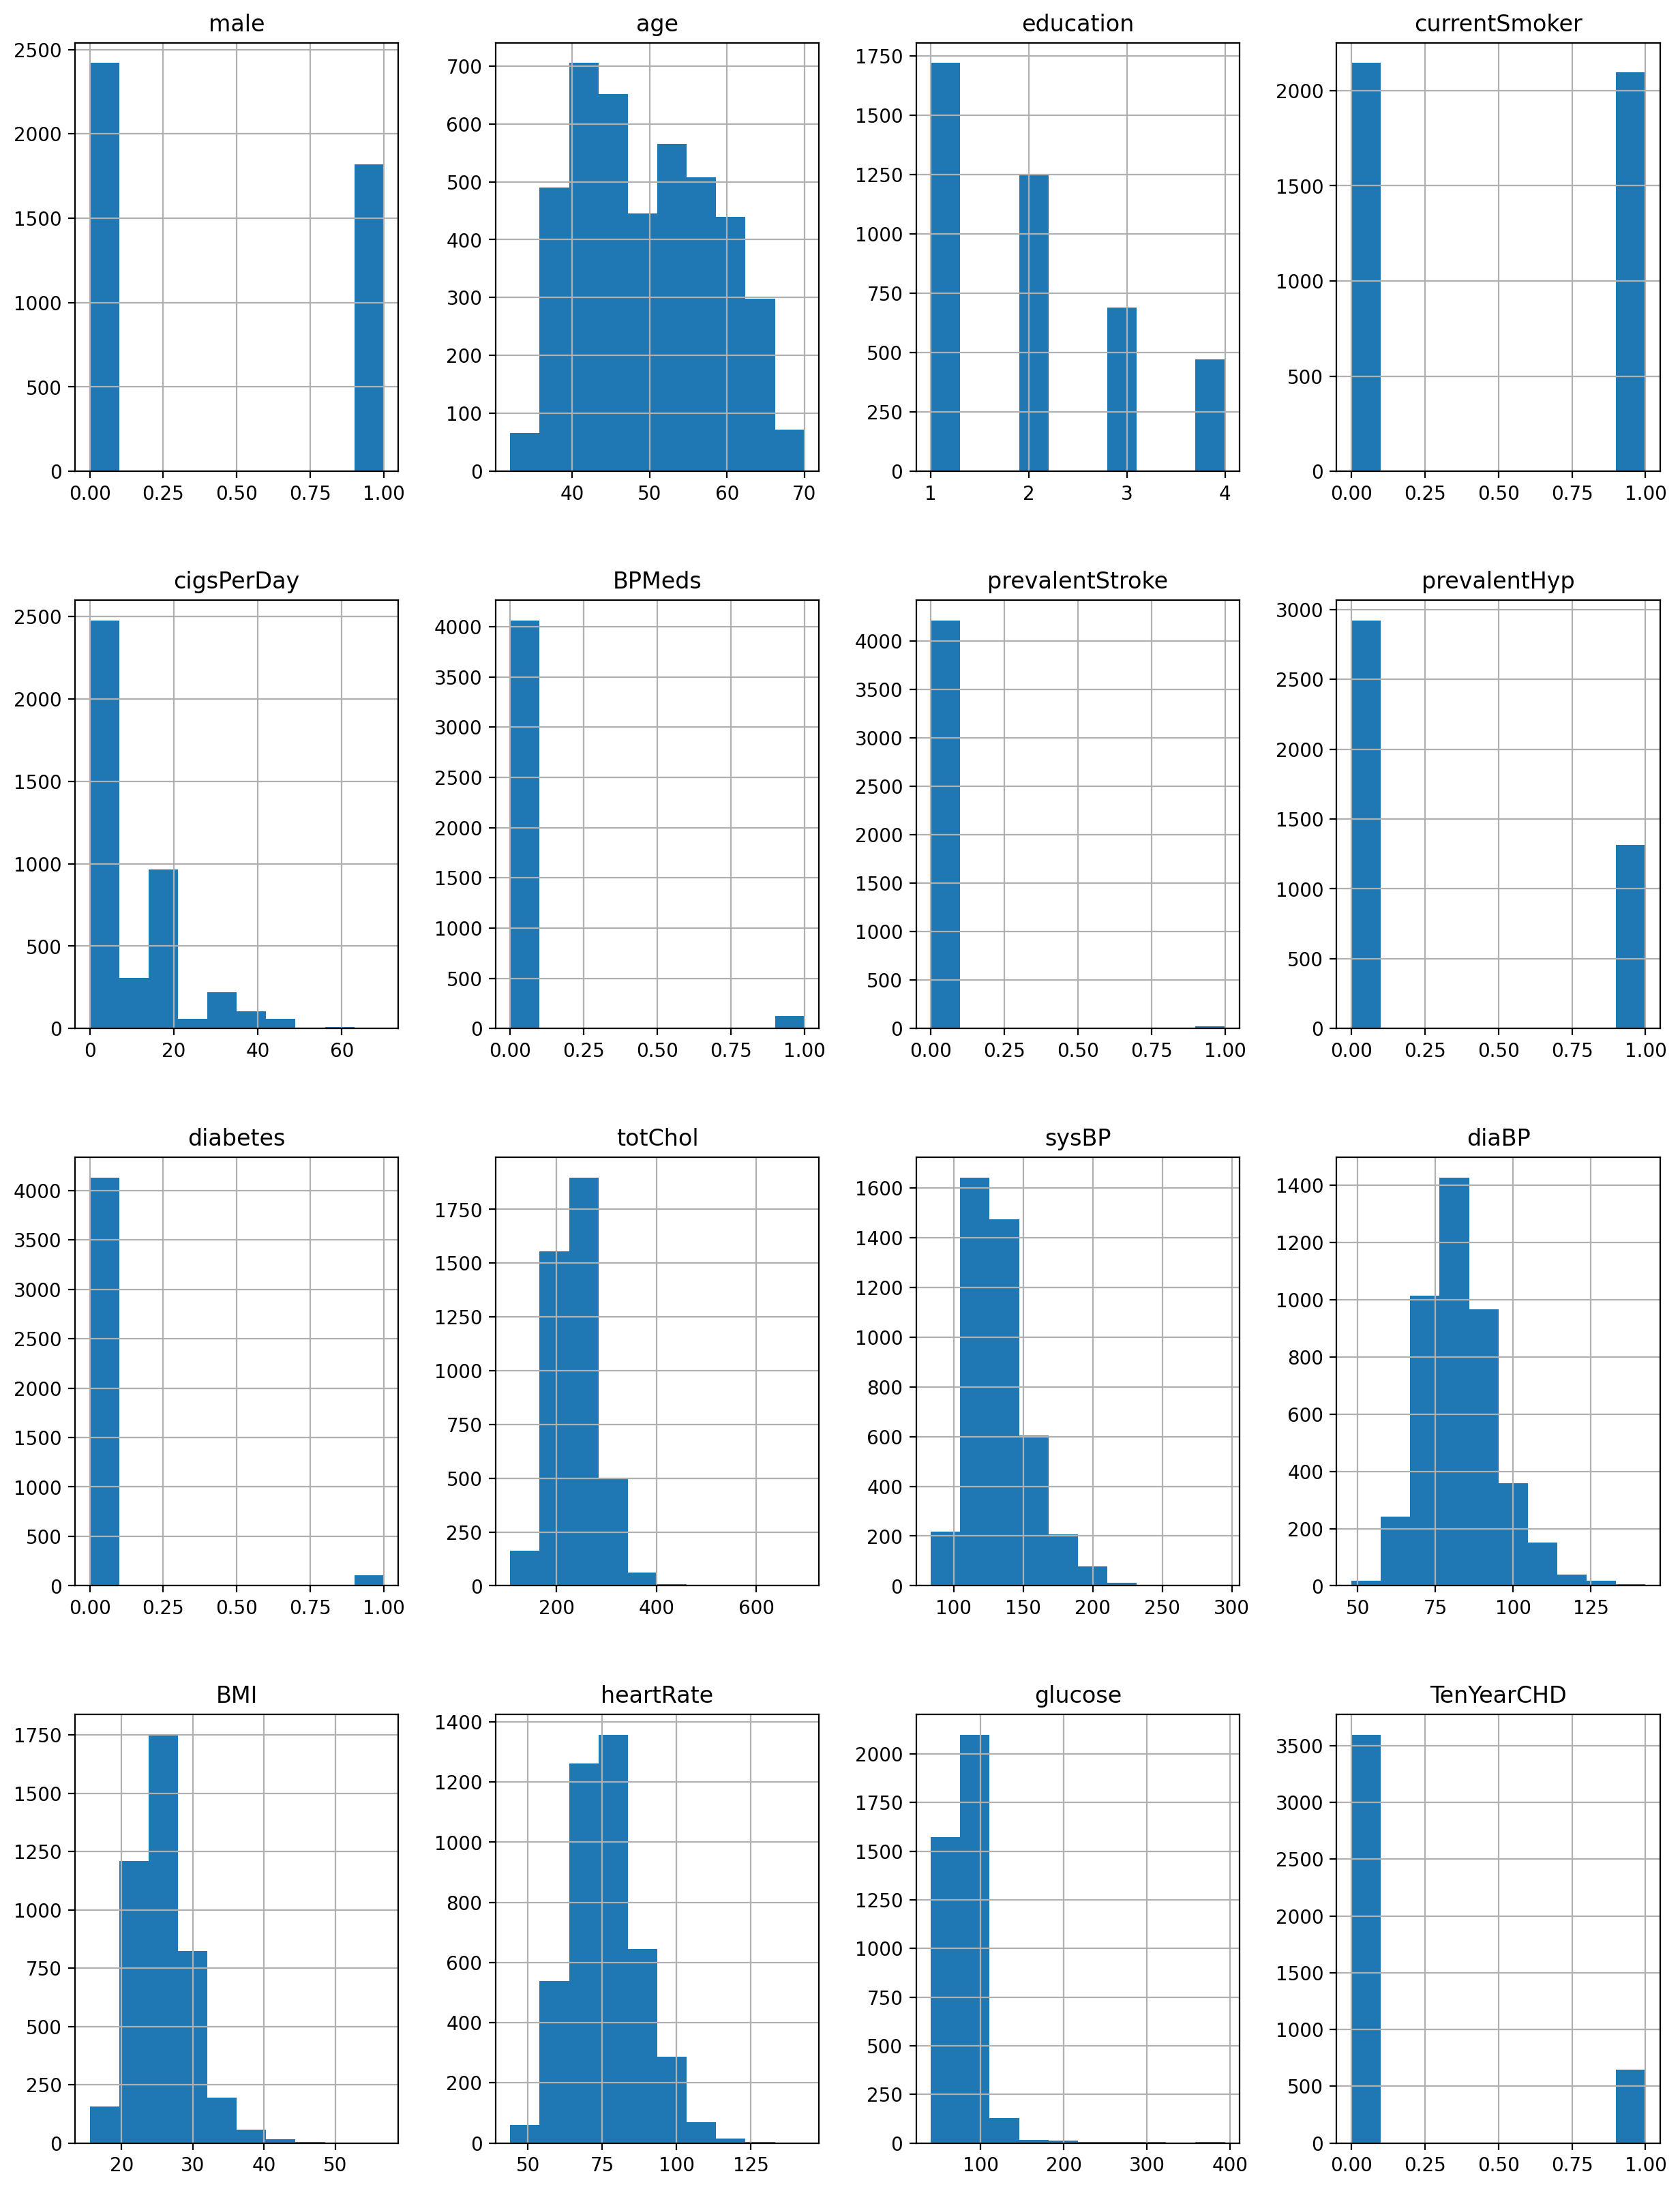

In [7]:
# checking distributions using histograms
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)

<Axes: >

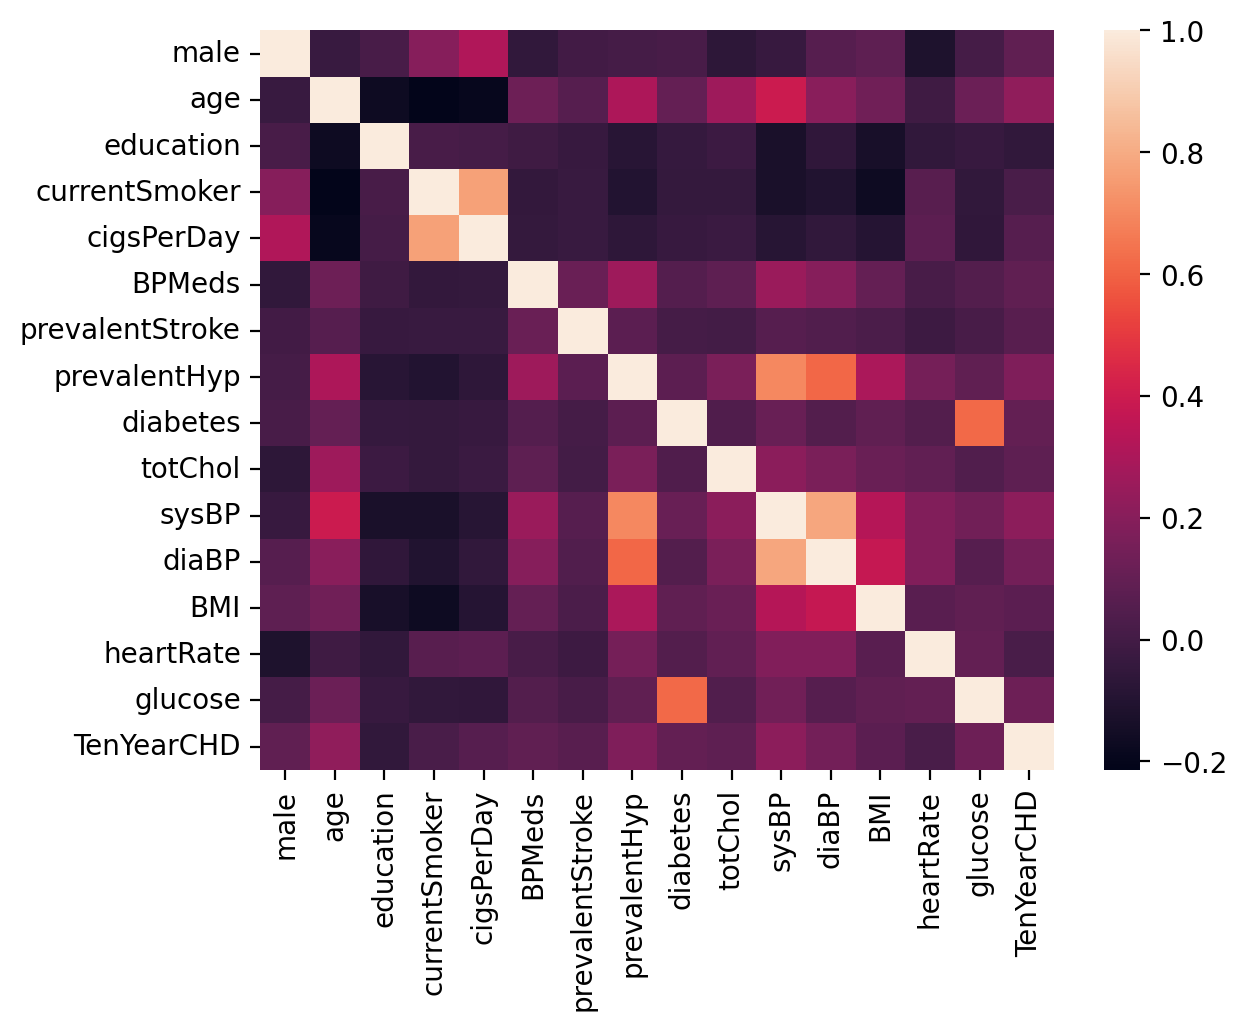

In [8]:
# checking which features are correlated with each other and are correlated with the outcome variable
df_corr = df.corr()
sns.heatmap(df_corr)

**Conclusions from Heatmap:**

We are dropping the column *education* because a doctor would have to decide on which education level to put a patient and this could result in very subjective outcomes and it is also not very handy to put in practice.

The two features are not correlated to the outcome variable. In that case we would have kept them.

In [9]:
# Dropping columns education and glucose
df = df.drop('education', axis = 1)
df.columns
#remove column education from df >>

Index(['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [10]:
# Checking for more missing data 
df.isna().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [11]:
# Dropping all rows with missing data
df = df.dropna()
#Remove all rows from df having missing values >>
df.isna().sum()
df.columns

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

Index(['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

## Feature Selection *<a name="paragraph2"></a>*

In [12]:
# Identify the features with the most importance for the outcome variable Heart Disease

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# separate independent & dependent variables
X = df.iloc[:,0:14]  #independent columns
y = df.iloc[:,-1]    #target column i.e price range

# apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(11,'Score'))  #print 10 best features

           Specs       Score
9          sysBP  667.109932
13       glucose  402.409837
1            age  297.974980
8        totChol  252.958627
3     cigsPerDay  185.115196
10         diaBP  142.920436
6   prevalentHyp   82.342164
7       diabetes   31.711253
4         BPMeds   26.116583
0           male   19.178560
11           BMI   17.108210


In [13]:
featureScores = featureScores.sort_values(by='Score', ascending=False)
featureScores

Specs       Score
9             sysBP  667.109932
13          glucose  402.409837
1               age  297.974980
8           totChol  252.958627
3        cigsPerDay  185.115196
10            diaBP  142.920436
6      prevalentHyp   82.342164
7          diabetes   31.711253
4            BPMeds   26.116583
0              male   19.178560
11              BMI   17.108210
5   prevalentStroke    8.480982
12        heartRate    3.635480
2     currentSmoker    0.904429

<Figure size 2000x500 with 0 Axes>

<Axes: xlabel='Specs', ylabel='Score'>

Text(0.5, 1.0, 'Feature importance')

Text(0.5, 0, '\n Features')

Text(0, 0.5, 'Importance \n')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'sysBP'),
  Text(1, 0, 'glucose'),
  Text(2, 0, 'age'),
  Text(3, 0, 'totChol'),
  Text(4, 0, 'cigsPerDay'),
  Text(5, 0, 'diaBP'),
  Text(6, 0, 'prevalentHyp'),
  Text(7, 0, 'diabetes'),
  Text(8, 0, 'BPMeds'),
  Text(9, 0, 'male'),
  Text(10, 0, 'BMI'),
  Text(11, 0, 'prevalentStroke'),
  Text(12, 0, 'heartRate'),
  Text(13, 0, 'currentSmoker')])

(array([  0., 100., 200., 300., 400., 500., 600., 700., 800.]),
 [Text(0, 0.0, '0'),
  Text(0, 100.0, '100'),
  Text(0, 200.0, '200'),
  Text(0, 300.0, '300'),
  Text(0, 400.0, '400'),
  Text(0, 500.0, '500'),
  Text(0, 600.0, '600'),
  Text(0, 700.0, '700'),
  Text(0, 800.0, '800')])

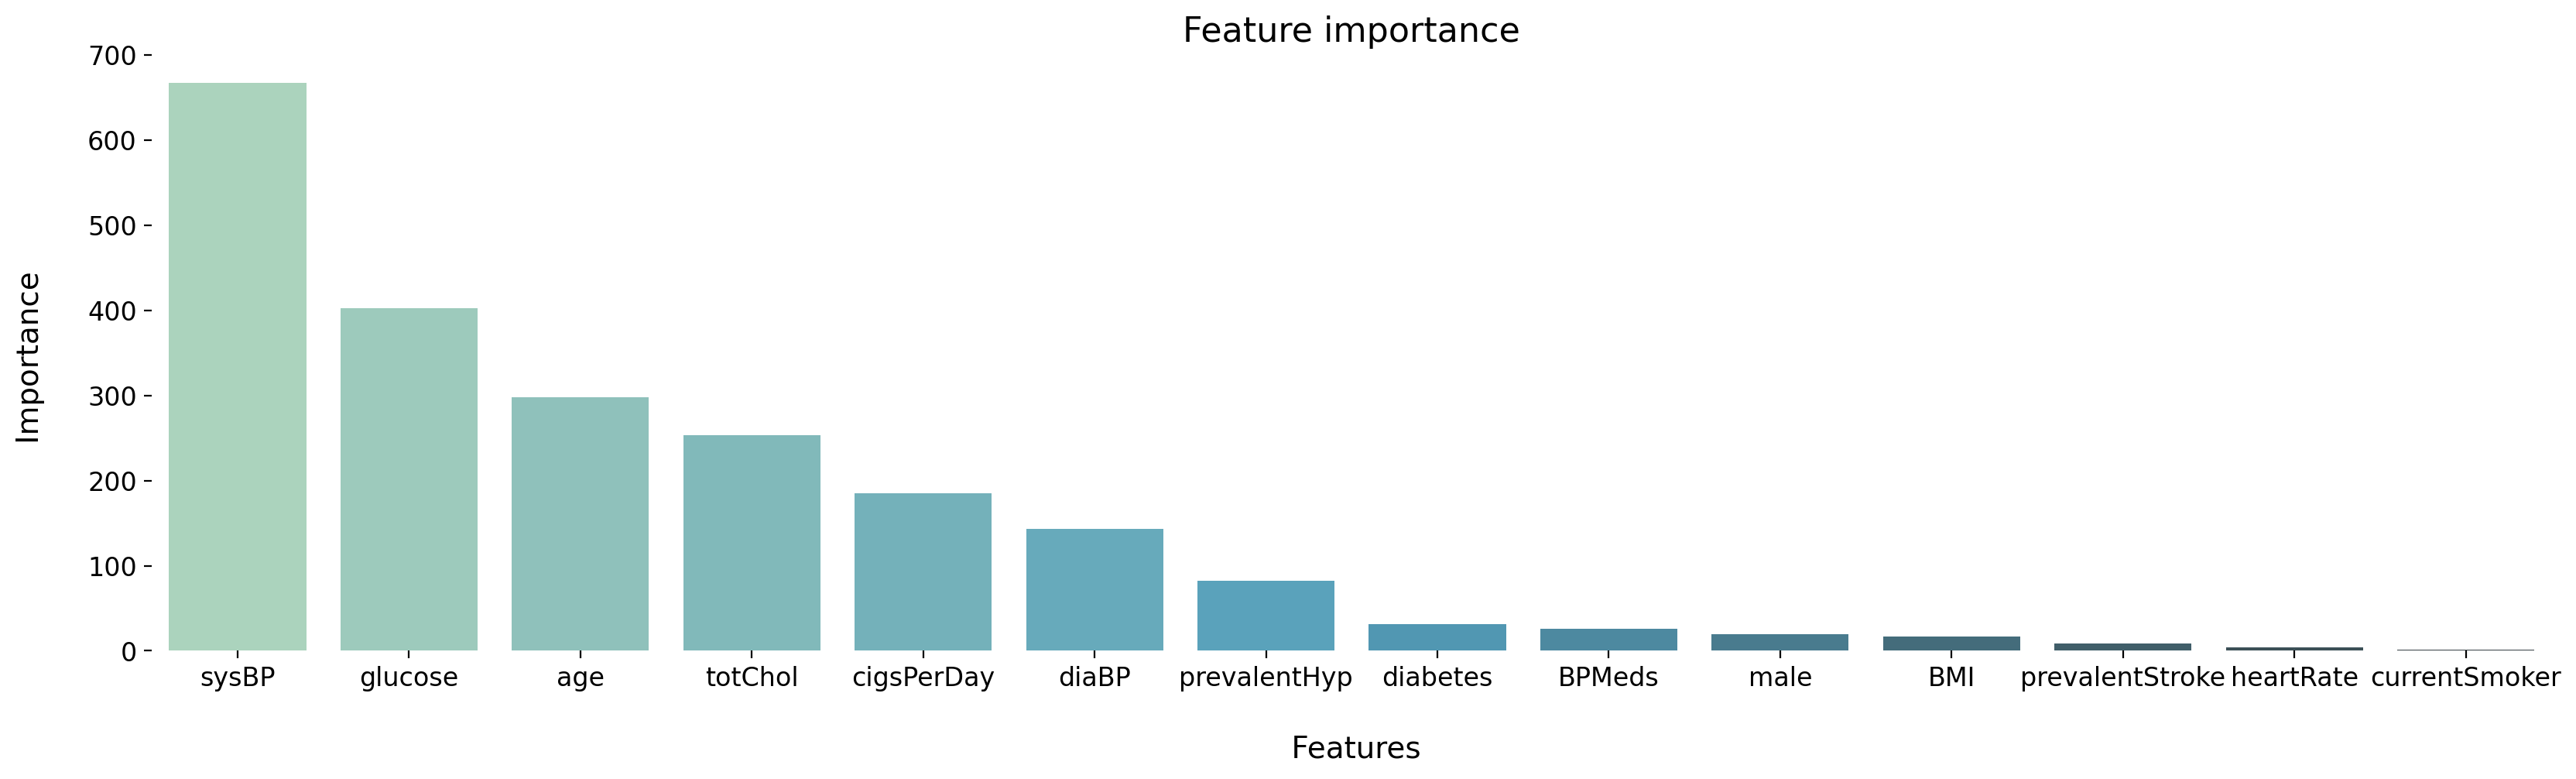

In [14]:
# visualizing feature selection
plt.figure(figsize=(20,5))
sns.barplot(x='Specs', y='Score', data=featureScores, palette = "GnBu_d")
plt.box(False)
plt.title('Feature importance', fontsize=16)
plt.xlabel('\n Features', fontsize=14)
plt.ylabel('Importance \n', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [15]:
# selecting the 10 most impactful features for the target variable
features_list = featureScores["Specs"].tolist()[:10]
features_list

['sysBP',
 'glucose',
 'age',
 'totChol',
 'cigsPerDay',
 'diaBP',
 'prevalentHyp',
 'diabetes',
 'BPMeds',
 'male']

We will only keep those features that have the strongest relationship with the output variable. These features are:
- Systolic Blood Pressure
- Glucose
- Age
- Cholesterin
- Cigarettes per Day
- Diastolic Blood Pressure
- Hypertensive
- Diabetes
- Blood Pressure Medication
- Gender

In [16]:
# Create new dataframe with selected features

df = df[['sysBP', 'glucose','age','totChol','cigsPerDay','diaBP','prevalentHyp','diabetes','BPMeds','male','TenYearCHD']]
df.head()

sysBP  glucose  age  totChol  cigsPerDay  diaBP  prevalentHyp  diabetes  \
0  106.0     77.0   39    195.0         0.0   70.0             0         0   
1  121.0     76.0   46    250.0         0.0   81.0             0         0   
2  127.5     70.0   48    245.0        20.0   80.0             0         0   
3  150.0    103.0   61    225.0        30.0   95.0             1         0   
4  130.0     85.0   46    285.0        23.0   84.0             0         0   

   BPMeds  male  TenYearCHD  
0     0.0     1           0  
1     0.0     0           0  
2     0.0     1           0  
3     0.0     0           1  
4     0.0     0           0

<Axes: >

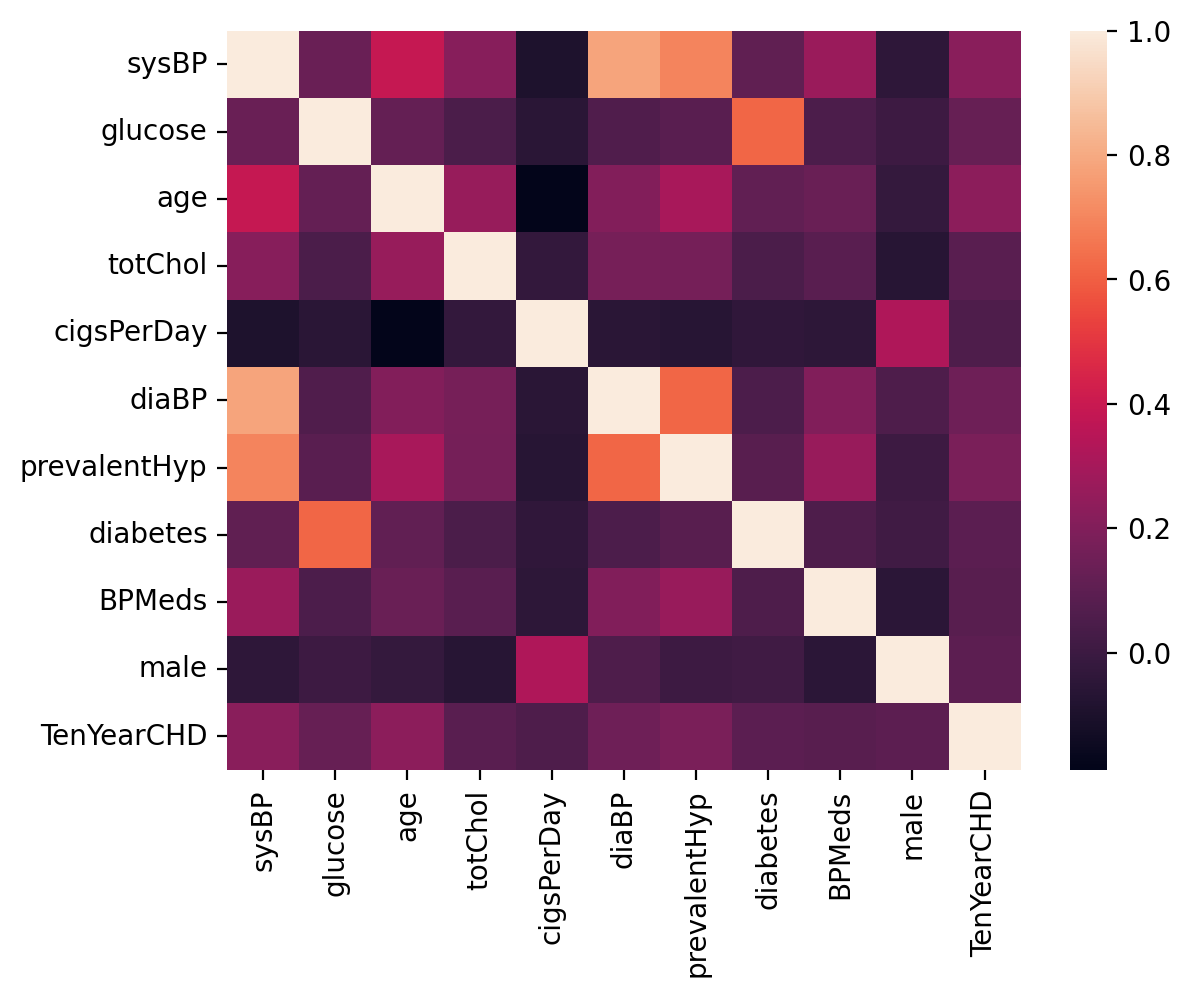

In [17]:
# Checking correlation again
df_corr = df.corr()
sns.heatmap(df_corr)

sysBP      glucose          age      totChol   cigsPerDay  \
count  3749.000000  3749.000000  3749.000000  3749.000000  3749.000000   
mean    132.354628    81.863964    49.572419   236.708722     9.010936   
std      22.044275    23.869703     8.572367    43.586786    11.927370   
min      83.500000    40.000000    32.000000   113.000000     0.000000   
25%     117.000000    71.000000    42.000000   206.000000     0.000000   
50%     128.000000    78.000000    49.000000   234.000000     0.000000   
75%     143.500000    87.000000    56.000000   264.000000    20.000000   
max     295.000000   394.000000    70.000000   464.000000    70.000000   

             diaBP  prevalentHyp     diabetes       BPMeds         male  \
count  3749.000000   3749.000000  3749.000000  3749.000000  3749.000000   
mean     82.934516      0.311550     0.026941     0.030408     0.445185   
std      11.934410      0.463189     0.161931     0.171730     0.497053   
min      48.000000      0.000000     0.000000     0.000000     0.000000   
25%      75.000000      0.000000     0.000000     0.000000     0.000000   
50%      82.000000      0.000000     0.000000     0.000000     0.000000   
75%      90.000000      1.000000     0.000000     0.000000     1.000000   
max     142.500000      1.000000     1.000000     1.000000     1.000000   

        TenYearCHD  
count  3749.000000  
mean      0.152307  
std       0.359366  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

C:\App\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


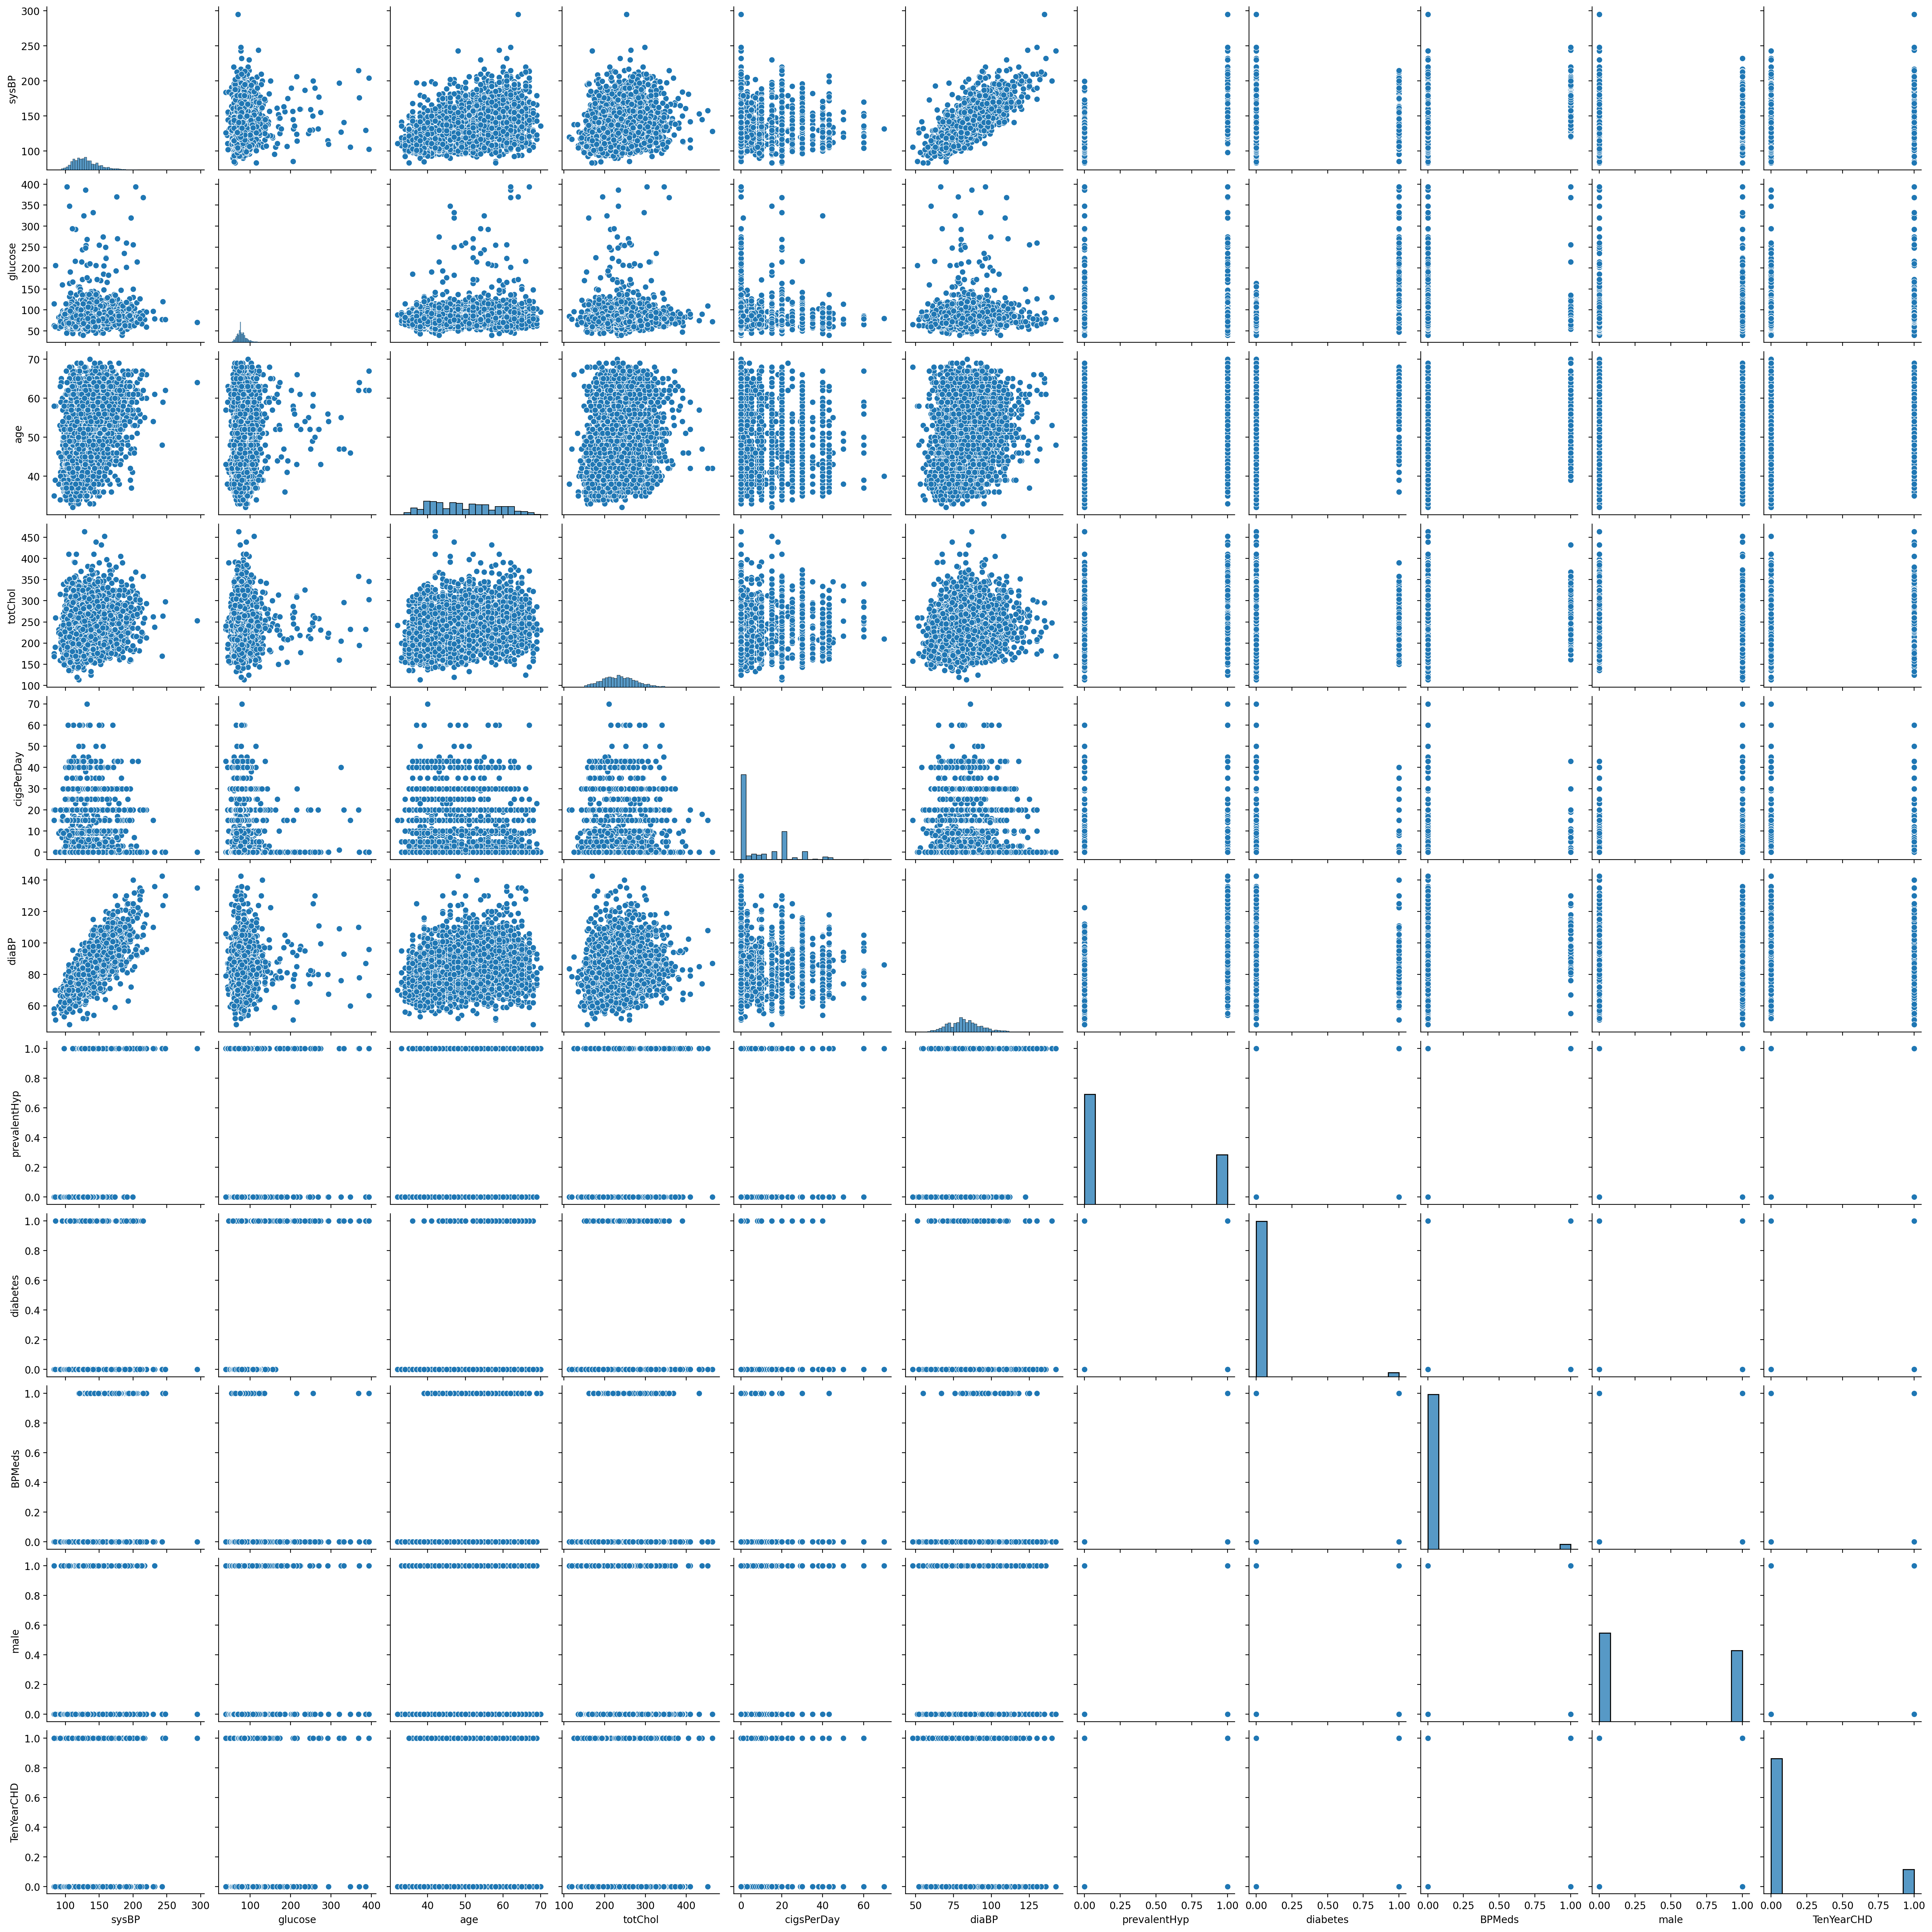

In [22]:
# Checking for outliers
df.describe()
sns.pairplot(df)

<Axes: >

Empty DataFrame
Columns: [sysBP, glucose, age, totChol, cigsPerDay, diaBP, prevalentHyp, diabetes, BPMeds, male, TenYearCHD]
Index: []

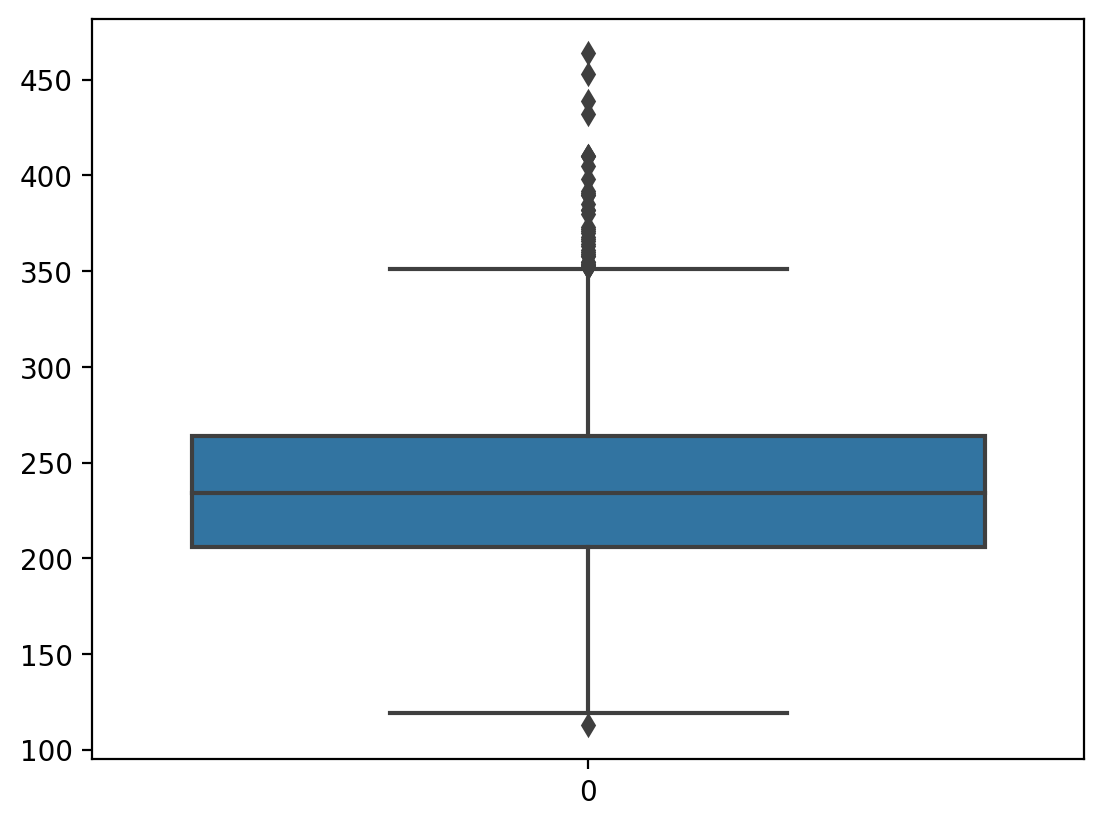

In [23]:
# Zooming into cholesterin outliers

sns.boxplot(df.totChol)
outliers = df[(df['totChol'] > 500)] 
outliers

<Axes: >

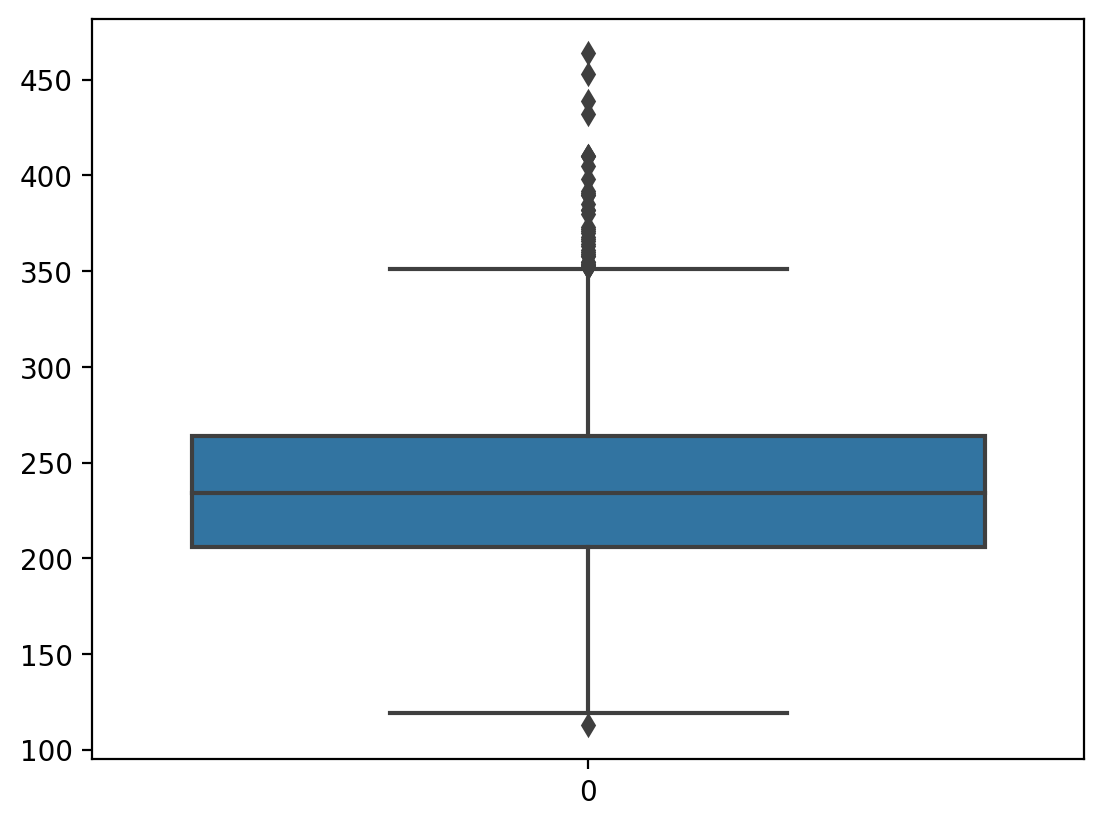

In [20]:
# Dropping 2 outliers in cholesterin
df = df.drop(df[df.totChol > 599].index)
sns.boxplot(df.totChol)

In [21]:
df_clean = df


## Feature Scaling <a name="paragraph2"></a>
Since we want to try out different models, and also these that use distance as a measure, we will scale our features.

In [24]:
scaler = MinMaxScaler(feature_range=(0,1)) 

#assign scaler to column:
df_scaled = scaler.fit_transform(df_clean.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns = ['sysBP', 'glucose', 'age', 'totChol', 'cigsPerDay', 'diaBP',
       'prevalentHyp', 'diabetes', 'BPMeds', 'male', 'TenYearCHD'])
df_scaled.head()

#Scale the columns in df_clean >>


sysBP   glucose       age   totChol  cigsPerDay     diaBP  prevalentHyp  \
0  0.106383  0.104520  0.184211  0.233618    0.000000  0.232804           0.0   
1  0.177305  0.101695  0.368421  0.390313    0.000000  0.349206           0.0   
2  0.208038  0.084746  0.421053  0.376068    0.285714  0.338624           0.0   
3  0.314421  0.177966  0.763158  0.319088    0.428571  0.497354           1.0   
4  0.219858  0.127119  0.368421  0.490028    0.328571  0.380952           0.0   

   diabetes  BPMeds  male  TenYearCHD  
0       0.0     0.0   1.0         0.0  
1       0.0     0.0   0.0         0.0  
2       0.0     0.0   1.0         0.0  
3       0.0     0.0   0.0         1.0  
4       0.0     0.0   0.0         0.0

In [25]:
df_scaled.describe()
df.describe()

sysBP      glucose          age      totChol   cigsPerDay  \
count  3749.000000  3749.000000  3749.000000  3749.000000  3749.000000   
mean      0.230991     0.118260     0.462432     0.352447     0.128728   
std       0.104228     0.067429     0.225589     0.124179     0.170391   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.158392     0.087571     0.263158     0.264957     0.000000   
50%       0.210402     0.107345     0.447368     0.344729     0.000000   
75%       0.283688     0.132768     0.631579     0.430199     0.285714   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

             diaBP  prevalentHyp     diabetes       BPMeds         male  \
count  3749.000000   3749.000000  3749.000000  3749.000000  3749.000000   
mean      0.369677      0.311550     0.026941     0.030408     0.445185   
std       0.126290      0.463189     0.161931     0.171730     0.497053   
min       0.000000      0.000000     0.000000     0.000000     0.000000   
25%       0.285714      0.000000     0.000000     0.000000     0.000000   
50%       0.359788      0.000000     0.000000     0.000000     0.000000   
75%       0.444444      1.000000     0.000000     0.000000     1.000000   
max       1.000000      1.000000     1.000000     1.000000     1.000000   

        TenYearCHD  
count  3749.000000  
mean      0.152307  
std       0.359366  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

sysBP      glucose          age      totChol   cigsPerDay  \
count  3749.000000  3749.000000  3749.000000  3749.000000  3749.000000   
mean    132.354628    81.863964    49.572419   236.708722     9.010936   
std      22.044275    23.869703     8.572367    43.586786    11.927370   
min      83.500000    40.000000    32.000000   113.000000     0.000000   
25%     117.000000    71.000000    42.000000   206.000000     0.000000   
50%     128.000000    78.000000    49.000000   234.000000     0.000000   
75%     143.500000    87.000000    56.000000   264.000000    20.000000   
max     295.000000   394.000000    70.000000   464.000000    70.000000   

             diaBP  prevalentHyp     diabetes       BPMeds         male  \
count  3749.000000   3749.000000  3749.000000  3749.000000  3749.000000   
mean     82.934516      0.311550     0.026941     0.030408     0.445185   
std      11.934410      0.463189     0.161931     0.171730     0.497053   
min      48.000000      0.000000     0.000000     0.000000     0.000000   
25%      75.000000      0.000000     0.000000     0.000000     0.000000   
50%      82.000000      0.000000     0.000000     0.000000     0.000000   
75%      90.000000      1.000000     0.000000     0.000000     1.000000   
max     142.500000      1.000000     1.000000     1.000000     1.000000   

        TenYearCHD  
count  3749.000000  
mean      0.152307  
std       0.359366  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

## Test - Train Split <a name="paragraph3"></a>

In [34]:
# clarify what is y and what is x label
y = df_scaled['TenYearCHD']
X = df_scaled.drop(['TenYearCHD'], axis = 1)

# divide train test: 80 % - 20 %
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=29)

In [36]:
len(X_train)
len(X_test)



2999

750

## Resampling imbalanced Dataset <a name="paragraph4"></a>

Class 0: 3178
Class 1: 571
Proportion: 5.57 : 1


<Axes: xlabel='TenYearCHD', ylabel='count'>

Text(0.5, 0, 'Heart Disease No/Yes')

Text(0, 0.5, 'Patient Count')

Text(0.5, 1.0, 'Count Outcome Heart Disease\n')

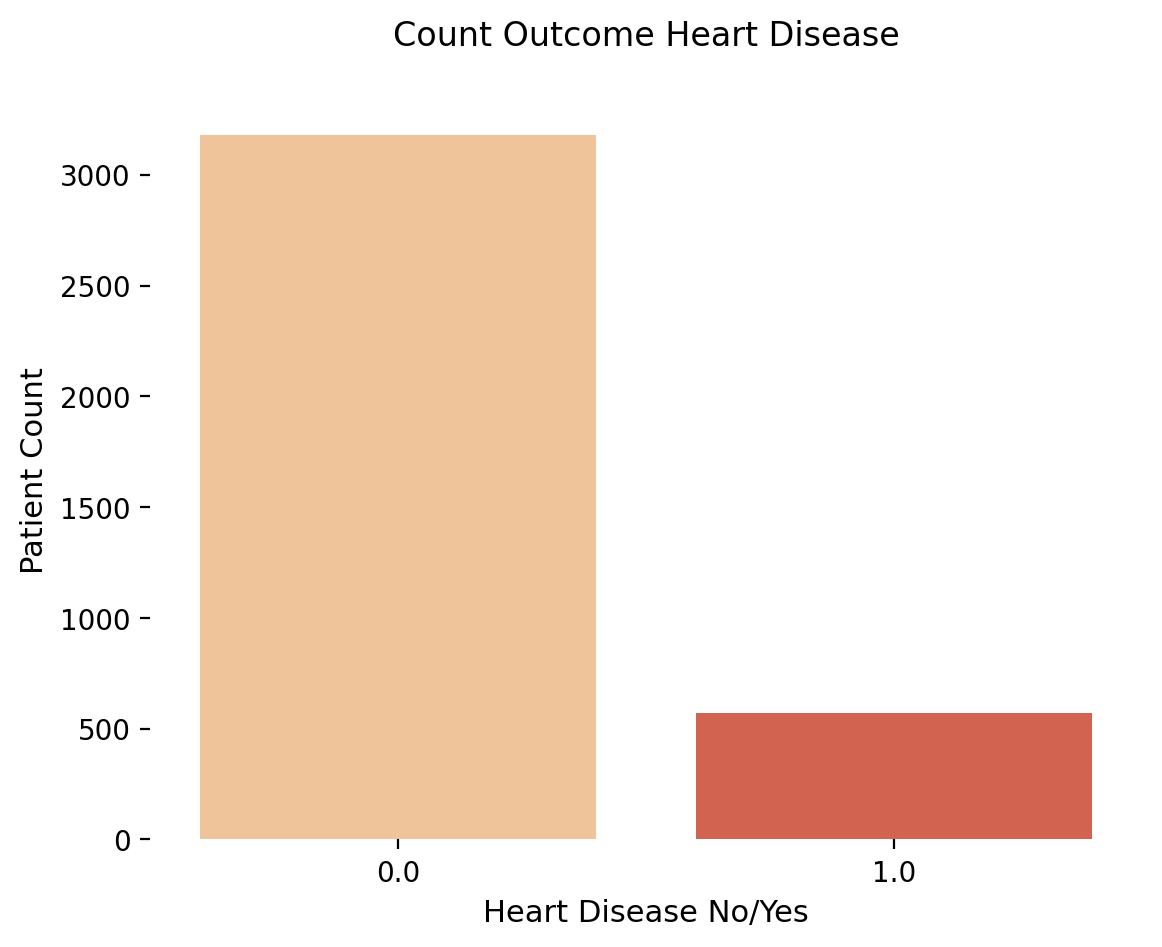

In [27]:
# Checking balance of outcome variable
target_count = df_scaled.TenYearCHD.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')



sns.countplot(data = df_scaled, x = "TenYearCHD", palette="OrRd")
plt.box(False)
plt.xlabel('Heart Disease No/Yes',fontsize=11)
plt.ylabel('Patient Count',fontsize=11)
plt.title('Count Outcome Heart Disease\n')
plt.savefig('Balance Heart Disease.png')
plt.show()


We can see that the proportion is 5.57:1 which is not well balanced.
One of the major issues when dealing with unbalanced datasets relates to the metrics used to evaluate a model. Using simpler metrics like accuracy_score can be misleading. In a dataset with highly unbalanced classes, if the classifier always "predicts" the most common class without performing any analysis of the features, it will still have a high accuracy rate, obviously illusory.

### UNDERSAMPLING METHOD

Undersampling aims to decrease the number of instances from the overrepresented class in the data set. In our case, these techniques will decrease the number of fraudulent transactions in our data to approximately 50:50. If we do not balance the number of instances, most classification algorithms will heavily focus on the majority class. As a result, it might seem like your algorithm is achieving superb results when, in reality, it is simply always predicting the majority class.

The easiest way to do so is to randomly select observations from the majority class and remove them from the data set until we achieve a balance between the majority and minority class.


In [ ]:
# Shuffle df
np.random.seed(10)
shuffled_df = df_scaled.sample(frac=1).reset_index(drop = True)
#->>>TODO <<<--- << Shuffle df_scaled >> 
shuffled_df.head(10)
df_scaled.head(10)


# Put all the fraud class in a separate dataset.
CHD_df = shuffled_df.loc[shuffled_df['TenYearCHD'] == 1]

#Randomly select 492 observations from the non-fraud (majority class)
non_CHD_df = shuffled_df.loc[shuffled_df['TenYearCHD'] == 0].sample(n=611,random_state=42)

# Concatenate both dataframes again
normalized_df = pd.concat([CHD_df, non_CHD_df])

# check new class counts
normalized_df.TenYearCHD.value_counts()
normalized_df.TenYearCHD


# plot new count
sns.countplot(data = normalized_df, x = "TenYearCHD", palette="OrRd")
plt.box(False)
plt.xlabel('Heart Disease No/Yes',fontsize=11)
plt.ylabel('Patient Count',fontsize=11)
plt.title('Count Outcome Heart Disease after Resampling\n')
plt.savefig('Balance Heart Disease1.png')
plt.show()

> ## **Model Pipeline** <a name="paragraph5"></a>

In [37]:
y_train = normalized_df['TenYearCHD']
X_train = normalized_df.drop('TenYearCHD', axis=1)

from sklearn.pipeline import Pipeline

classifiers = [LogisticRegression(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(2)]

for classifier in classifiers:
    pipe = Pipeline(steps=[('classifier', classifier)])
    pipe.fit(X_train, y_train)   
    print("The accuracy score of {0} is: {1:.2f}%".format(classifier,(pipe.score(X_test, y_test)*100)))


Pipeline(steps=[('classifier', LogisticRegression())])

The accuracy score of LogisticRegression() is: 66.53%


Pipeline(steps=[('classifier', SVC())])

The accuracy score of SVC() is: 65.60%


Pipeline(steps=[('classifier', DecisionTreeClassifier())])

The accuracy score of DecisionTreeClassifier() is: 72.40%


Pipeline(steps=[('classifier', KNeighborsClassifier(n_neighbors=2))])

The accuracy score of KNeighborsClassifier(n_neighbors=2) is: 81.60%


## Modelling & Evaluation (without Pipeline) <a name="paragraph6"></a>

### 1. Logistic Regression

In [38]:
# logistic regression again with the balanced dataset

normalized_df_reg = LogisticRegression().fit(X_train, y_train)

normalized_df_reg_pred = normalized_df_reg.predict(X_test)

# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
acc = accuracy_score(y_test, normalized_df_reg_pred)
print(f"The accuracy score for LogReg is: {round(acc,3)*100}%")

# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
f1 = f1_score(y_test, normalized_df_reg_pred)
print(f"The f1 score for LogReg is: {round(f1,3)*100}%")

# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precision = precision_score(y_test, normalized_df_reg_pred)
print(f"The precision score for LogReg is: {round(precision,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/actual yes
recall = recall_score(y_test, normalized_df_reg_pred)
print(f"The recall score for LogReg is: {round(recall,3)*100}%")

The accuracy score for LogReg is: 66.5%
The f1 score for LogReg is: 37.7%
The precision score for LogReg is: 26.6%
The recall score for LogReg is: 65.0%


<Axes: >

Text(0.5, 1.1, 'Confusion matrix Logistic Regression\n')

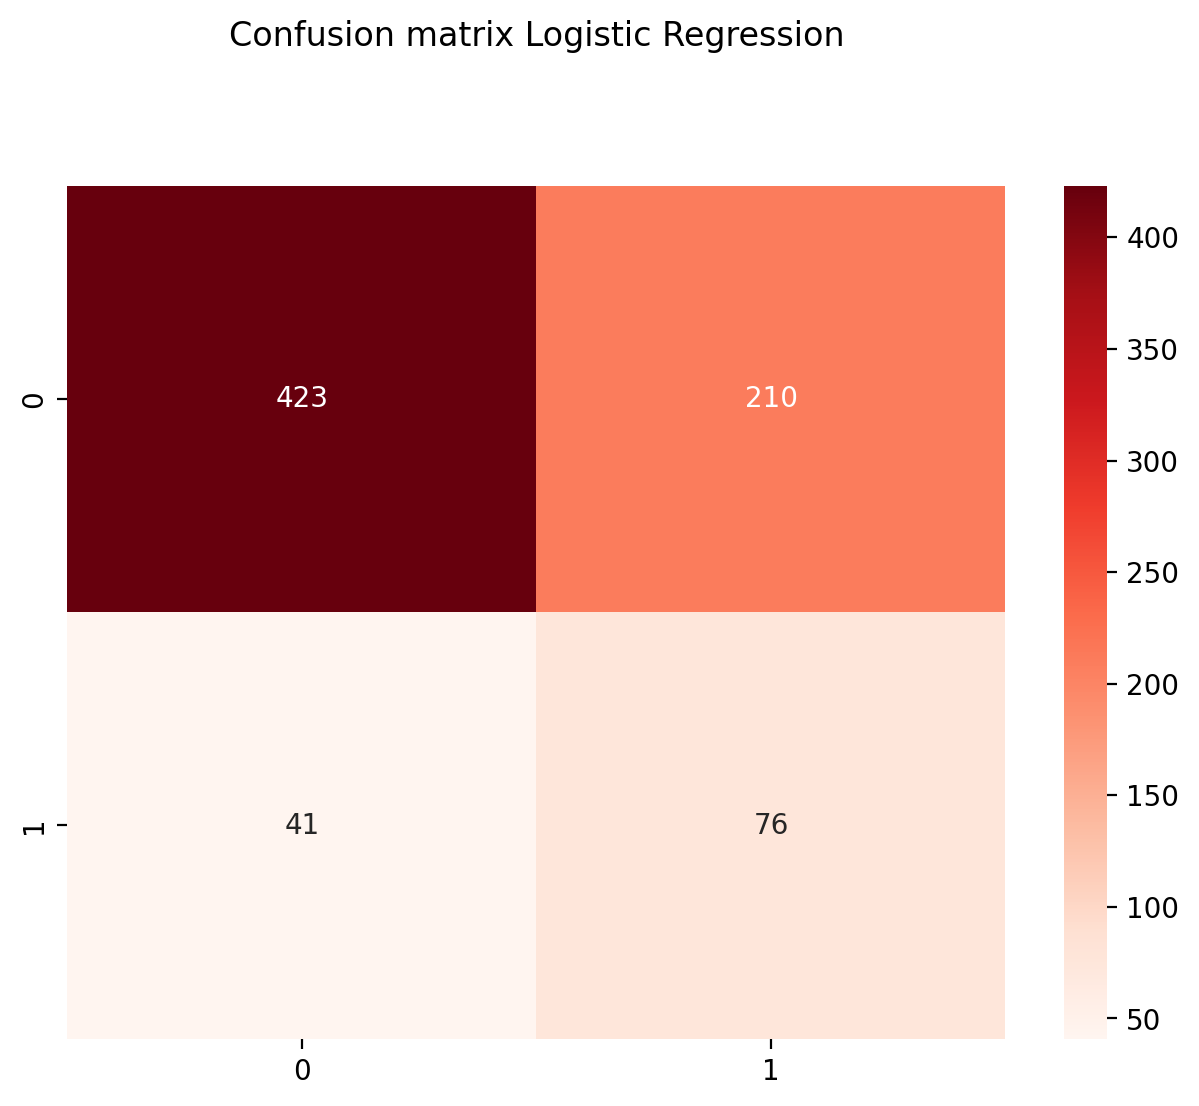

In [39]:
# plotting confusion matrix LogReg

cnf_matrix_log = confusion_matrix(y_test, normalized_df_reg_pred)

sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True,cmap="Reds" , fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Logistic Regression\n', y=1.1)

### 2. SVM

In [40]:
# Support Vector Machine

#initialize model
svm = SVC()

#fit model
svm.fit(X_train, y_train)

normalized_df_svm_pred = svm.predict(X_test)

# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
acc = accuracy_score(y_test, normalized_df_svm_pred)
print(f"The accuracy score for SVM is: {round(acc,3)*100}%")

# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
f1 = f1_score(y_test, normalized_df_svm_pred)
print(f"The f1 score for SVM is: {round(f1,3)*100}%")

# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precision = precision_score(y_test, normalized_df_svm_pred)
print(f"The precision score for SVM is: {round(precision,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/actual yes
recall = recall_score(y_test, normalized_df_svm_pred)
print(f"The recall score for SVM is: {round(recall,3)*100}%")


SVC()

The accuracy score for SVM is: 65.60000000000001%
The f1 score for SVM is: 38.3%
The precision score for SVM is: 26.6%
The recall score for SVM is: 68.4%


<Axes: >

Text(0.5, 1.1, 'Confusion matrix SVM\n')

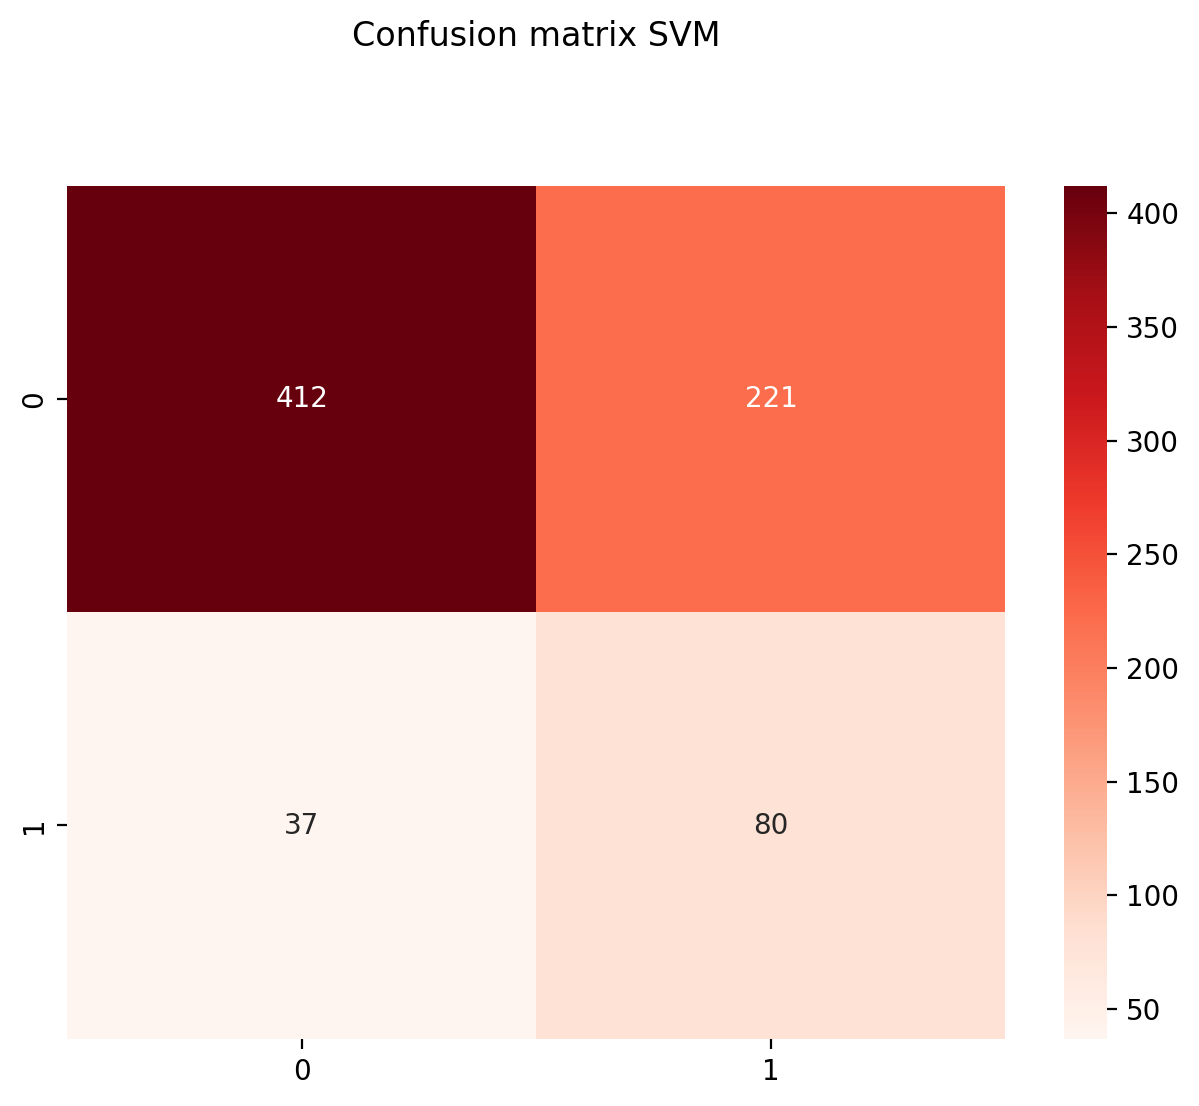

In [41]:
# plotting confusion matrix SVM

cnf_matrix_svm = confusion_matrix(y_test, normalized_df_svm_pred)

sns.heatmap(pd.DataFrame(cnf_matrix_svm), annot=True,cmap="Reds" , fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix SVM\n', y=1.1)

### 3. Decision Tree

In [42]:
# Decision Tree

#initialize model
dtc_up = DecisionTreeClassifier()

# fit model
dtc_up.fit(X_train, y_train)

normalized_df_dtc_pred = dtc_up.predict(X_test)

# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
acc = accuracy_score(y_test, normalized_df_dtc_pred)
print(f"The accuracy score for DTC is: {round(acc,3)*100}%")

# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
f1 = f1_score(y_test, normalized_df_dtc_pred)
print(f"The f1 score for DTC is: {round(f1,3)*100}%")

# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precision = precision_score(y_test, normalized_df_dtc_pred)
print(f"The precision score for DTC is: {round(precision,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/actual yes
recall = recall_score(y_test, normalized_df_dtc_pred)
print(f"The recall score for DTC is: {round(recall,3)*100}%")

DecisionTreeClassifier()

The accuracy score for DTC is: 72.89999999999999%
The f1 score for DTC is: 53.5%
The precision score for DTC is: 36.6%
The recall score for DTC is: 100.0%


<Axes: >

Text(0.5, 1.1, 'Confusion matrix Decision Tree\n')

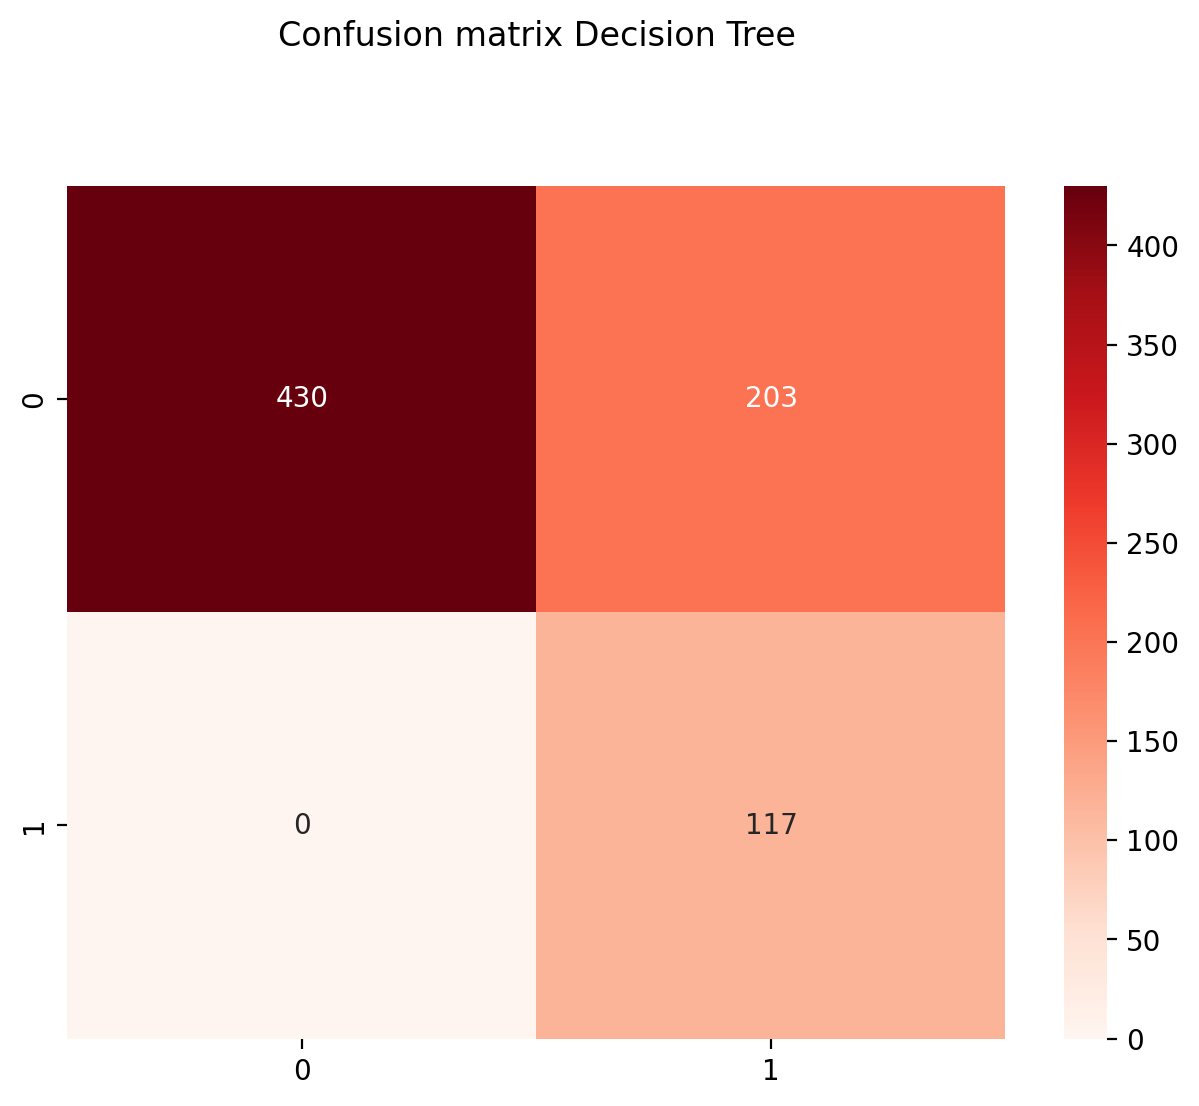

In [43]:
# plotting confusion matrix Decision Tree

cnf_matrix_dtc = confusion_matrix(y_test, normalized_df_dtc_pred)

sns.heatmap(pd.DataFrame(cnf_matrix_dtc), annot=True,cmap="Reds" , fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Decision Tree\n', y=1.1)


### 4. KNN

In [44]:
# KNN Model

#initialize model
knn = KNeighborsClassifier(n_neighbors = 2)

#fit model
knn.fit(X_train, y_train)

# prediction = knn.predict(x_test)
normalized_df_knn_pred = knn.predict(X_test)


# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
acc = accuracy_score(y_test, normalized_df_knn_pred)
print(f"The accuracy score for KNN is: {round(acc,3)*100}%")

# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
f1 = f1_score(y_test, normalized_df_knn_pred)
print(f"The f1 score for KNN is: {round(f1,3)*100}%")

# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precision = precision_score(y_test, normalized_df_knn_pred)
print(f"The precision score for KNN is: {round(precision,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/actual yes
recall = recall_score(y_test, normalized_df_knn_pred)
print(f"The recall score for KNN is: {round(recall,3)*100}%")

KNeighborsClassifier(n_neighbors=2)

The accuracy score for KNN is: 81.6%
The f1 score for KNN is: 49.3%
The precision score for KNN is: 43.2%
The recall score for KNN is: 57.3%


### Result: The KNN model has the highest accuracy score

In [45]:
# Check overfit of the KNN model
# accuracy test and train
acc_test = knn.score(X_test, y_test)
print("The accuracy score of the test data is: ",acc_test*100,"%")
acc_train = knn.score(X_train, y_train)
print("The accuracy score of the training data is: ",round(acc_train*100,2),"%")



The accuracy score of the test data is:  81.6 %
The accuracy score of the training data is:  79.36 %


**The scores for test and training data for the KNN model are similar. Therefore we do not expect the model to overfit.**

In [46]:
# Perform cross validation
'''Cross Validation is used to assess the predictive performance of the models and and to judge 
how they perform outside the sample to a new data set'''


cv_results = cross_val_score(knn, X, y, cv = 5)
#->>>TODO <<<--- << perform 5-fold cross validation on X, y>> 

print ("Cross-validated scores:", cv_results)
print("The Accuracy of Model with Cross Validation is: {0:.2f}%".format(cv_results.mean() * 100))

'Cross Validation is used to assess the predictive performance of the models and and to judge \nhow they perform outside the sample to a new data set'

Cross-validated scores: [0.83866667 0.83466667 0.83866667 0.84266667 0.8317757 ]
The Accuracy of Model with Cross Validation is: 83.73%


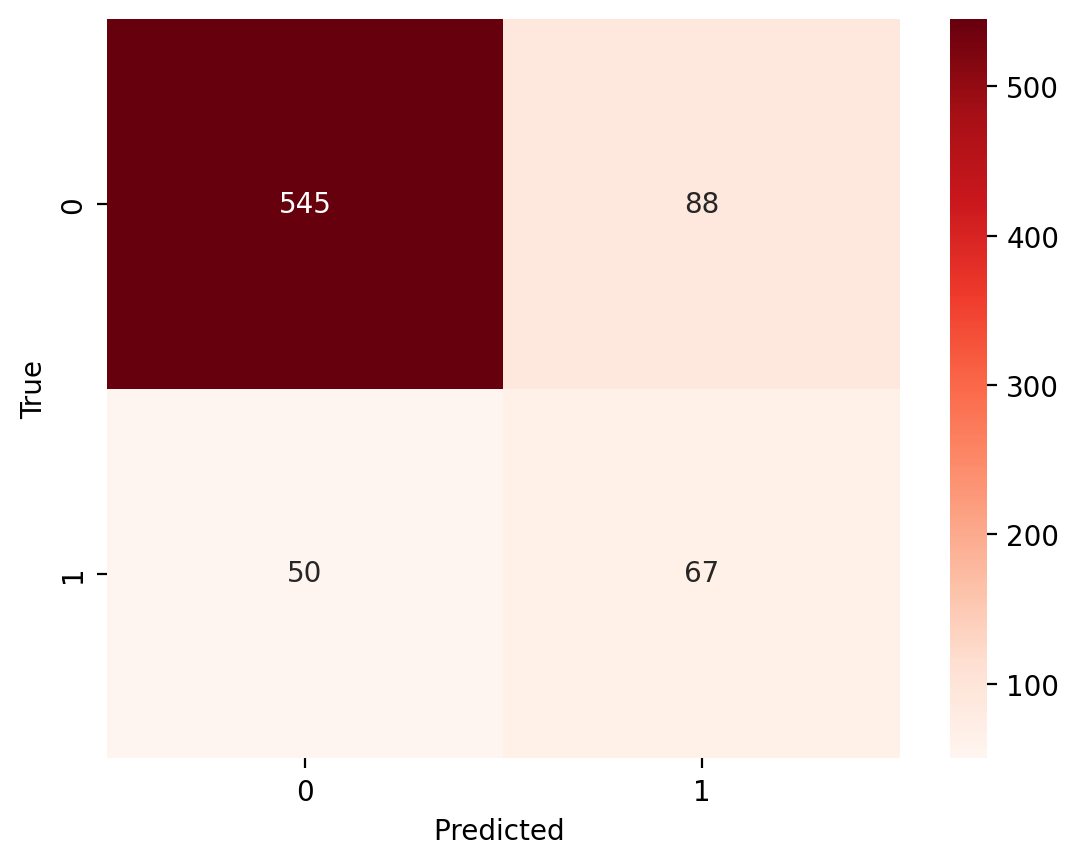

In [47]:
# plotting confusion matrix KNN

cnf_matrix_knn = confusion_matrix(y_test, normalized_df_knn_pred)

ax= plt.subplot()
sns.heatmap(pd.DataFrame(cnf_matrix_knn), annot=True,cmap="Reds" , fmt='g')

ax.set_xlabel('Predicted ');ax.set_ylabel('True'); 


"the AUC ROC Curve is a measure of performance based on plotting the true positive and false positive rate \nand calculating the area under that curve.The closer the score to 1 the better the algorithm's ability to \ndistinguish between the two outcome classes."

Text(0.5, 1.0, 'ROC CURVE KNN')

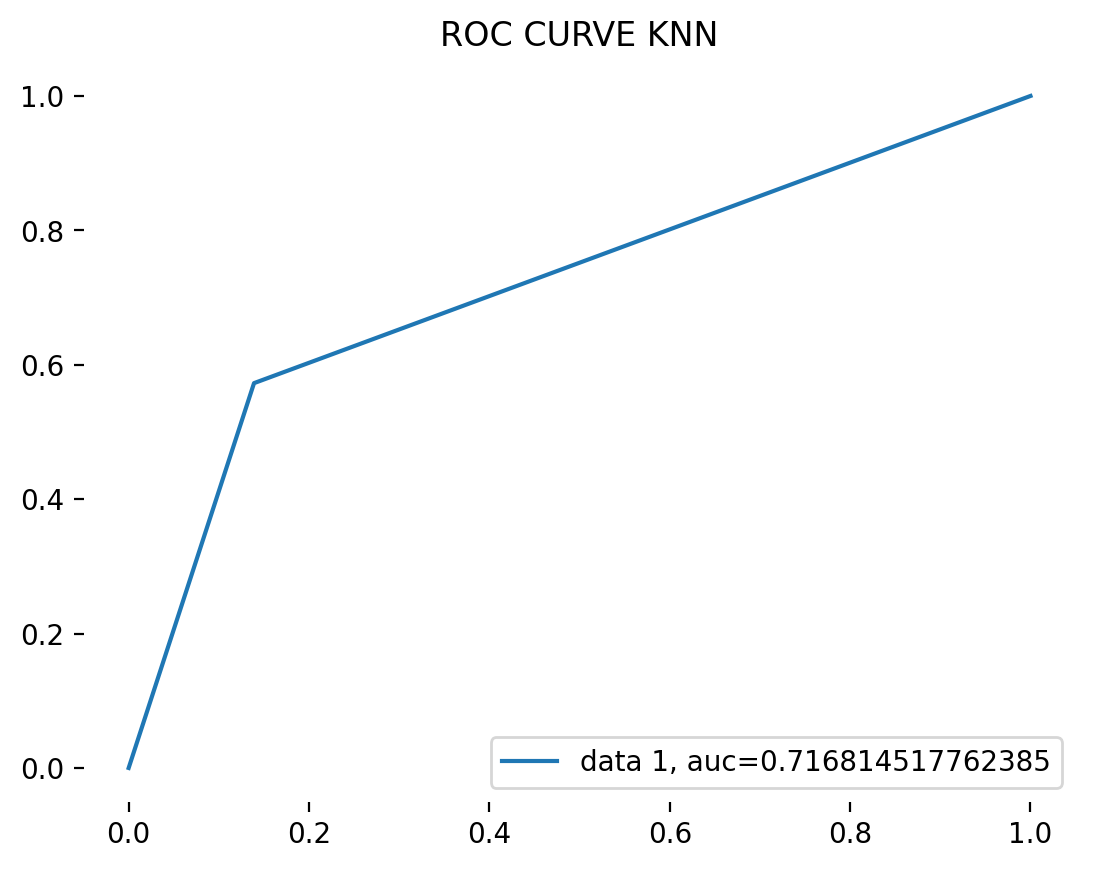

The score for the AUC ROC Curve is: 71.7%


In [48]:
# AU ROC CURVE KNN
'''the AUC ROC Curve is a measure of performance based on plotting the true positive and false positive rate 
and calculating the area under that curve.The closer the score to 1 the better the algorithm's ability to 
distinguish between the two outcome classes.'''

fpr, tpr, _ = roc_curve(y_test, normalized_df_knn_pred)
auc = roc_auc_score(y_test, normalized_df_knn_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.box(False)
plt.title ('ROC CURVE KNN')
plt.show()

print(f"The score for the AUC ROC Curve is: {round(auc,3)*100}%")

## Applying the model <a name="paragraph7"></a>

In [ ]:
def start_questionnaire():
    my_predictors = []
    parameters=['sysBP', 'glucose','age','totChol','cigsPerDay','diaBP','prevalentHyp','diabetes','BPMeds','male']
    
    print('Input Patient Information:')
    
    age = input("Patient's age: >>> ") 
    my_predictors.append(age)
    male = input("Patient's gender. male=1, female=0: >>> ") 
    my_predictors.append(male)
    cigsPerDay = input("Patient's smoked cigarettes per day: >>> ") 
    my_predictors.append(cigsPerDay)
    sysBP = input("Patient's systolic blood pressure: >>> ") 
    my_predictors.append(sysBP)
    diaBP = input("Patient's diastolic blood pressure: >>> ")
    my_predictors.append(diaBP)
    totChol = input("Patient's cholesterin level: >>> ") 
    my_predictors.append(totChol)
    prevalentHyp = input("Was Patient hypertensive? Yes=1, No=0 >>> ") 
    my_predictors.append(prevalentHyp)
    diabetes = input("Did Patient have diabetes? Yes=1, No=0 >>> ") 
    my_predictors.append(diabetes)
    glucose = input("What is the Patient's glucose level? >>> ") 
    my_predictors.append(diabetes)
    BPMeds = input("Has Patient been on Blood Pressure Medication? Yes=1, No=0 >>> ")
    my_predictors.append(BPMeds)
    
    my_data = dict(zip(parameters, my_predictors))
    my_df = pd.DataFrame(my_data, index=[0])
    scaler = MinMaxScaler(feature_range=(0,1)) 
   
    # assign scaler to column:
    my_df_scaled = pd.DataFrame(scaler.fit_transform(my_df), columns=my_df.columns)
    my_y_pred = knn.predict(my_df)
    print('\n')
    print('Result:')
    if my_y_pred == 1:
        print("The patient will develop a Heart Disease.")
    if my_y_pred == 0:
        print("The patient will not develop a Heart Disease.")
        
start_questionnaire()

Input Patient Information:
